<h2><u>What is DeOldify?</h2></u>
DeOldify is a cutting-edge tool for colourizing black-and-white photos and videos. DeOldify used GANs(Generative Adversarial Networks) to colourize both images to create colourized stable video. But now it uses a variant of GAN called NoGAN, developed for DeOldify.

![do1.png](https://i.ytimg.com/vi/1EP_Lq04h4M/maxresdefault.jpg)


Some of the DeOldify project's new features include:

* Glitch removal in video
* Skin tone that is more correct
* Blue colour has a lower bias.
* More highly detailed and hyper-realistic outputs using NoGAN, a novel effective

In [ ]:
# clone the github file 'https://github.com/jantic/DeOldify.git'
! git clone 'https://github.com/jantic/DeOldify.git'

Cloning into 'DeOldify'...
remote: Enumerating objects: 2567, done.
remote: Counting objects: 100% (222/222), done.
remote: Compressing objects: 100% (160/160), done.
remote: Total 2567 (delta 62), reused 185 (delta 56), pack-reused 2345
Receiving objects: 100% (2567/2567), 69.70 MiB | 28.25 MiB/s, done.
Resolving deltas: 100% (1143/1143), done.


Change the working directory to DeOldify using the cd command.

In [ ]:
# Change the working directory to DeOldify
import os
os.chdir('/content/DeOldify')


<h3><u>Setup</h3></u>

In this step, setup the device GPU in order to make the colorizing process smooth. We will using GPU instead of CPU as we have to work with images and videos and GPU performs well in this case. First import device from deoldify, then DeviceId from deoldify.device_id. Next set the device ID of the device to the device ID of the GPU. 

In [ ]:
# import the mentioned libraries
from deoldify import device
from deoldify.device_id import DeviceId
#set the device ID
device.set(device=DeviceId.GPU0)


<DeviceId.GPU0: 0>

Now import torch, which is a Python package that provides two high-level features: Tensor computation (like NumPy) with strong GPU acceleration and Deep neural networks built on a tape-based autograd system. https://pypi.org/project/torch/. Next. check if GPU is available or not using the torch.cuda.is_available function.

In [ ]:
# import torch
import torch
# check for GPU
if not torch.cuda.is_available():
  print("GPU is not availble")
else:
  print("GPU is available")

GPU is available


Next install all the mentioned requirements in the requirements.txt
These are the required libraries.
* fastai==1.0.51 : a deep learning library, https://github.com/fastai/fastai
* tensorboardX==1.6 : A module for visualization with tensorboard, https://tensorboardx.readthedocs.io/en/latest/tensorboard.html
* ffmpeg-python : cross-platform solution to record, convert and stream audio and video, https://github.com/kkroening/ffmpeg-python
* youtube-dl>=2019.4.17: download manager for video and audio from YouTube, https://github.com/ytdl-org/youtube-dl
* opencv-python>=3.3.0.10 : for computer vision and image processing tasks, https://pypi.org/project/opencv-python/
* pillow==8.3.2 : support for opening, manipulating, and saving many different image file formats, https://pillow.readthedocs.io/
* tornado~=5.1.0: a web application framework, https://www.tornadoweb.org/




In [ ]:
#install required libraries
! pip install -r /content/DeOldify/requirements-colab.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 237 kB 8.1 MB/s 
     |████████████████████████████████| 125 kB 70.5 MB/s 
     |████████████████████████████████| 2.8 MB 71.1 MB/s 
     |████████████████████████████████| 631 kB 79.1 MB/s 
     |████████████████████████████████| 355 kB 76.7 MB/s 
     |████████████████████████████████| 357 kB 77.2 MB/s 
     |████████████████████████████████| 2.3 MB 58.6 MB/s 
     |████████████████████████████████| 193 kB 81.7 MB/s 
     |████████████████████████████████| 106 kB 79.2 MB/s 
  Created wheel for imgaug: filename=imgaug-0.2.6-py3-none-any.whl size=654019 sha256=1d48d1a597046c23e351aa7032cad2e09742b932e6335d4c28926194b1634f32
  Stored in directory: /root/.cache/pip/wheels/41/23/e8/b1016c275f713978d312621da3c4f55920ec4297798aba8a5a
  Created wheel for nvidia-ml-py3: filename=nvidia_ml_py3-7.352.0-py3-none-any.whl size=19190 sha256=7296b17519cda0acf9aed

Import fastai, everything from deoldify.visualize and warnings. Filter the warnings using filterwarnings function.

In [ ]:
# import the mentioned libraries
import fastai
from deoldify.visualize import *
import warnings
# filter the warnings
warnings.filterwarnings('ignore',category=UserWarning, message='.*Your .*? set is empty.*?')

Now Download pretrained DeOldify models. Make a directory named 'models' using the mkdir command. And download the artistic deoldify model using the wget command. Here is the link of the model. https://data.deepai.org/deoldify/ColorizeArtistic_gen.pth

In [ ]:
# create the models directory
! mkdir 'models'
# download the pretrained artistic model
! wget https://data.deepai.org/deoldify/ColorizeArtistic_gen.pth -O ./models/ColorizeArtistic_gen.pth

mkdir: cannot create directory ‘models’: File exists
--2022-12-11 14:58:07--  https://data.deepai.org/deoldify/ColorizeArtistic_gen.pth
Resolving data.deepai.org (data.deepai.org)... 5.9.140.253
Connecting to data.deepai.org (data.deepai.org)|5.9.140.253|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 255144681 (243M) [application/octet-stream]
Saving to: ‘./models/ColorizeArtistic_gen.pth’

./models/ColorizeAr 100%[===================>] 243.32M  19.9MB/s    in 13s     

2022-12-11 14:58:21 (18.7 MB/s) - ‘./models/ColorizeArtistic_gen.pth’ saved [255144681/255144681]



Download the watermark image. This watermark will be placed on the colorized images and videos. https://media.githubusercontent.com/media/jantic/DeOldify/master/resource_images/watermark.png

In [ ]:
# Download the watermark image
! wget https://media.githubusercontent.com/media/jantic/DeOldify/master/resource_images/watermark.png -O ./resource_images/watermark.png

--2022-12-11 14:59:41--  https://media.githubusercontent.com/media/jantic/DeOldify/master/resource_images/watermark.png
Resolving media.githubusercontent.com (media.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2022-12-11 14:59:41 ERROR 404: Not Found.



Now create the image colorizer object using the get_image_colorizer method. Keep the artistic attribute as True as we are using the artistic model of colorizer.

In [ ]:
# create object
colorizer= get_image_colorizer(artistic=True)

/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also u

Next we will colorize the image by passing url of the image. Below mentioned are some of the parameters required for colorization.
* source_url:

Enter the URL for an image's direct connection. That usually implies they'll finish in.png,.jpg, or something like.
* render_factor:

This defines the resolution at which the image's colour section is presented. The default value of 35 was set with consideration and should enough in most cases.
* watermarked:

This option is selected by default, and it adds a watermark icon of a palette to the image's bottom left corner.

Colorize the image using the plot_transformed_image_from_url method passing the above mentioned attributes.

In [ ]:
pwd

'/content/DeOldify'

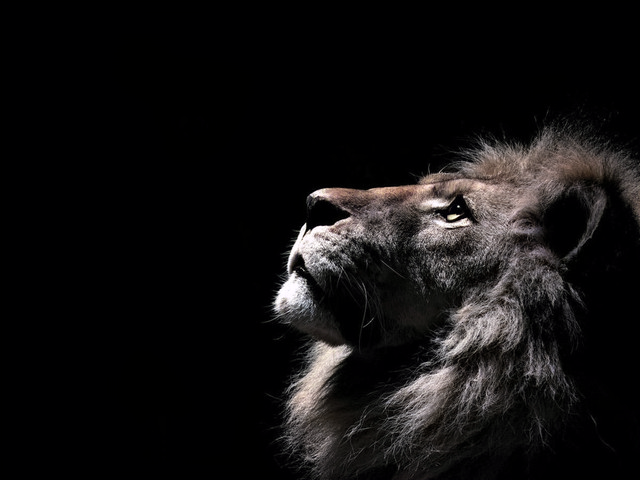

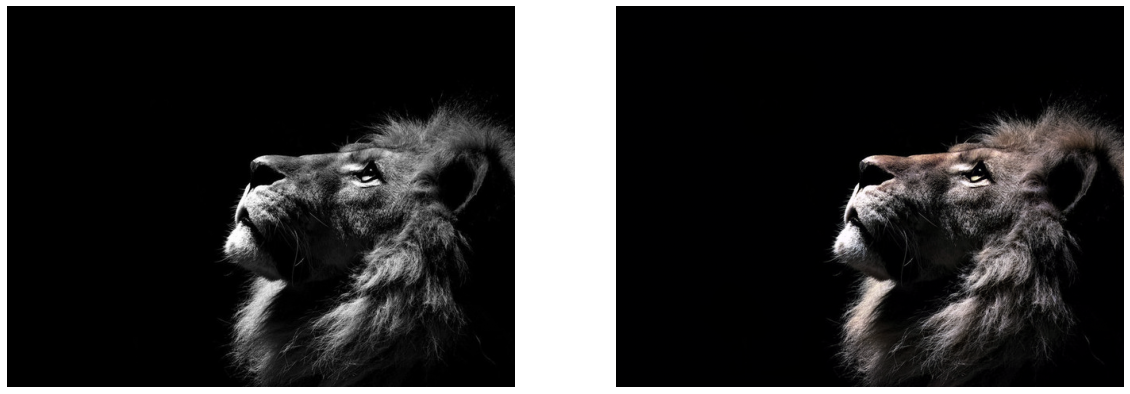

In [ ]:
# set the source url
source_url='https://i.ibb.co/3Yv4CVy/lion.jpg'
# set the render factor
render_factor=35
# set watermark as true
watermarked=True

# check the presence of source url
if source_url is not None and source_url !='':
    # get the colorized image path
    image_path = colorizer.plot_transformed_image_from_url(url=source_url, render_factor=render_factor, compare=True, watermarked=watermarked)
    # show the image
    show_image_in_notebook(image_path)
# show a message in case of url not provided
else:
  print('Provide an imageurl and try again')

You can also colorize an image from your device. In place of source url, add the location of the image.

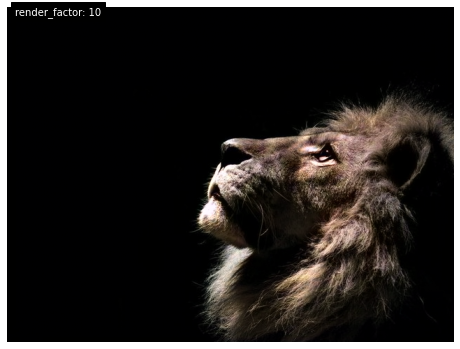

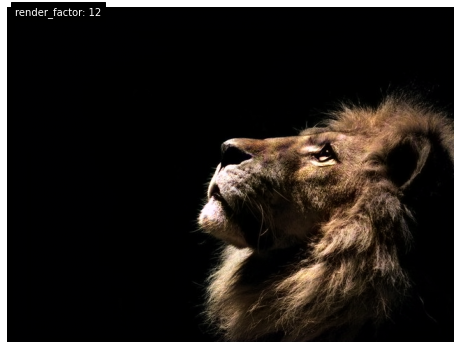

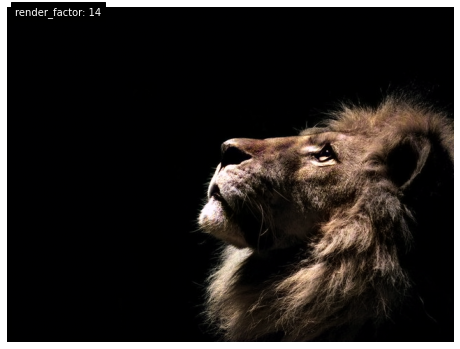

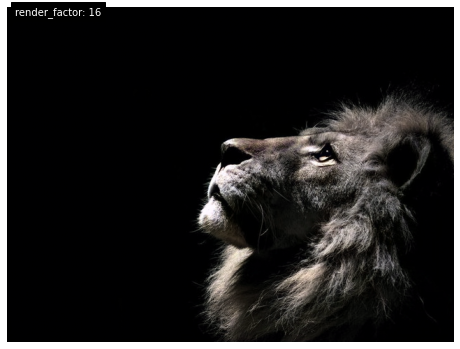

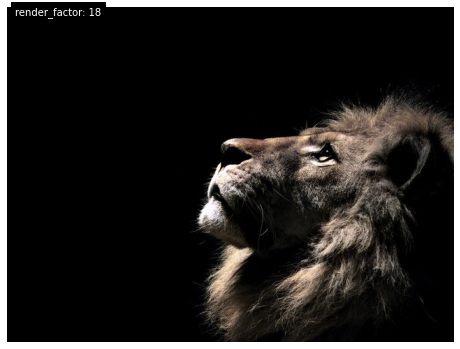

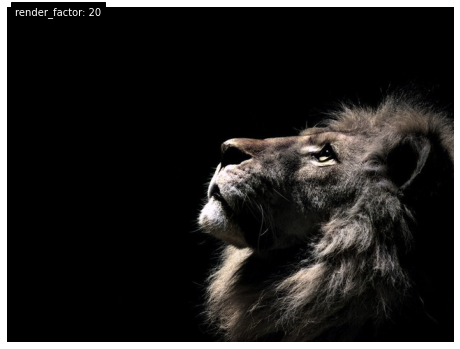

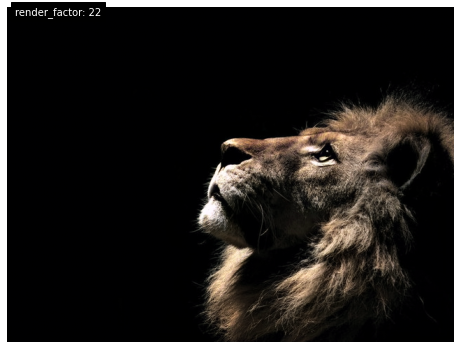

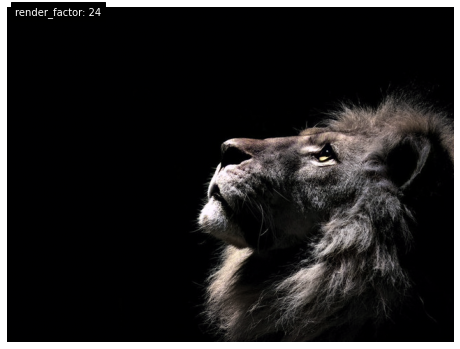

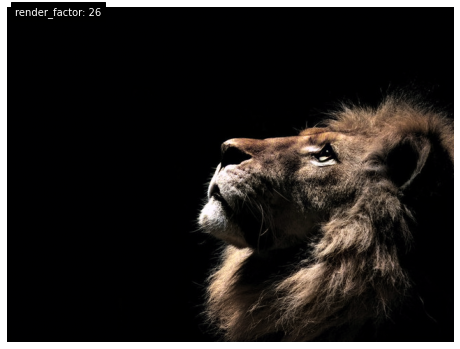

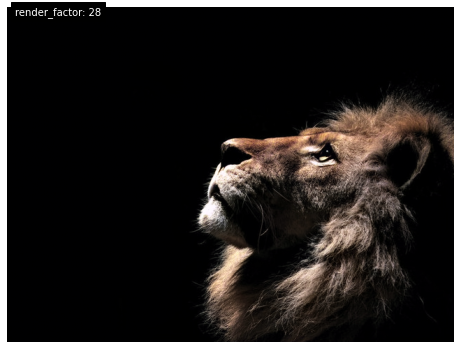

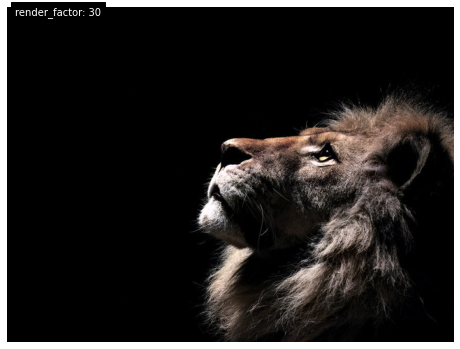

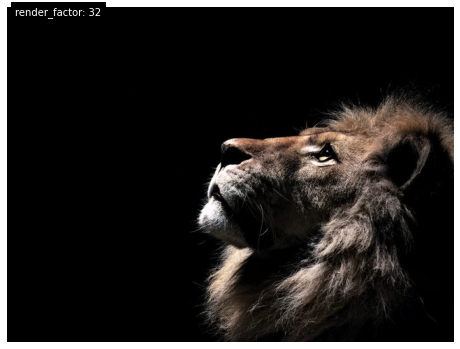

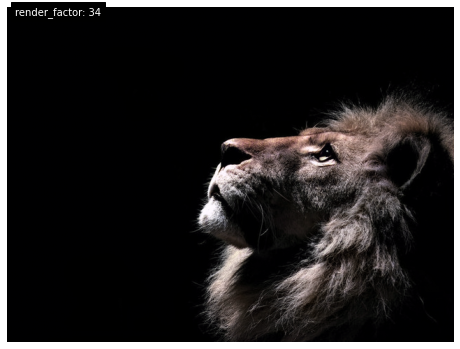

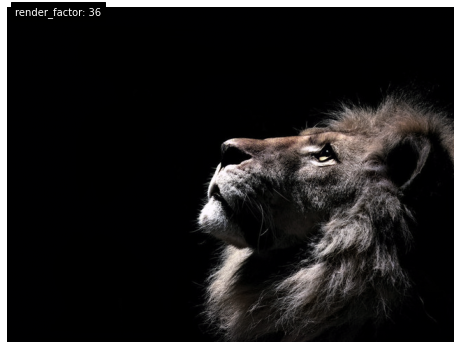

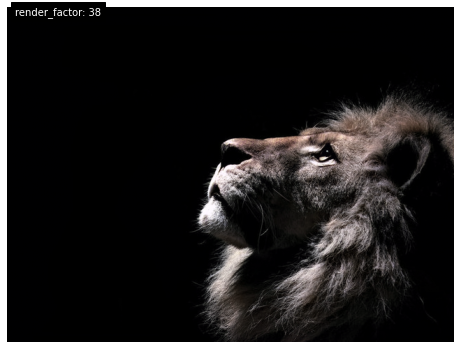

In [ ]:
# colorize the image and display it
for i in range(10,40,2):
  colorizer.plot_transformed_image('test_images/image.png', render_factor=i, display_render_factor=True, figsize=(8,8))

<h2><u>Colorizing videos</h2></u>

Now lets colorize some videos. 
<br>In the first step, Download Video Colorizing model of Deoldify using the wget command. https://data.deepai.org/deoldify/ColorizeVideo_gen.pth


In [ ]:
# download video colorizing model
! wget https://data.deepai.org/deoldify/ColorizeVideo_gen.pth -O ./models/ColorizeVideo_gen.pth

--2022-12-11 15:37:31--  https://data.deepai.org/deoldify/ColorizeVideo_gen.pth
Resolving data.deepai.org (data.deepai.org)... 5.9.140.253
Connecting to data.deepai.org (data.deepai.org)|5.9.140.253|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 874066230 (834M) [application/octet-stream]
Saving to: ‘./models/ColorizeVideo_gen.pth’

./models/ColorizeVi 100%[===================>] 833.57M  19.8MB/s    in 43s     

2022-12-11 15:38:15 (19.4 MB/s) - ‘./models/ColorizeVideo_gen.pth’ saved [874066230/874066230]



After downloading the model, Initialize video object using the get_video_colorizer method.


In [ ]:
# initialize video object
colorizer= get_video_colorizer()

/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:554: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also 

  0%|          | 0.00/171M [00:00<?, ?B/s]

Now set the parameters as done for colorizing images. For source url, provide the youtube link of a black and white video or video location from your device. Set the render factor and watermark value as well. Colorize the video using the colorize_from_url method.

In [ ]:
# set source url
source_url='https://www.youtube.com/watch?v=8txT8UGTCto'
# set render factor
render_factor=30
# set watermarked
watermarked=True
# get the colorized video path
video_path= colorizer.colorize_from_url(source_url, 'video1.mp4', render_factor, watermarked=watermarked)
# show the colorized video
show_video_in_notebook(video_path)

[youtube] 8txT8UGTCto: Downloading webpage
[youtube] 8txT8UGTCto: Downloading android player API JSON
[info] 8txT8UGTCto: Downloading 1 format(s): 136+140
[download] Destination: video/source/video1.f136.mp4
[download] 100% of   15.96MiB in 00:00:00 at 24.47MiB/s  
[download] Destination: video/source/video1.f140.m4a
[download] 100% of    3.37MiB in 00:00:00 at 11.52MiB/s  
[Merger] Merging formats into "video/source/video1.mp4"
Deleting original file video/source/video1.f140.m4a (pass -k to keep)
Deleting original file video/source/video1.f136.mp4 (pass -k to keep)


INFO:root:Video created here: video/result/video1.mp4


Video created here: video/result/video1.mp4
